In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from astropy.io import ascii
from utils import *
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datasets = "../datasets/SuperCOSMOS/"

In [3]:
%%time
uki823_df = ascii.read(datasets + "UKI823/sssedrpair.dat").to_pandas()
ukr823_df = ascii.read(datasets + "UKR823/sssedrpair.dat").to_pandas()
ukj823_df = ascii.read(datasets + "UKJ823/sssedrpair.dat").to_pandas()

CPU times: user 5.9 s, sys: 619 ms, total: 6.52 s
Wall time: 6.56 s


In [4]:
uki823_df.columns = col_names
ukr823_df.columns = col_names
ukj823_df.columns = col_names

In [5]:
uki823_df[['CLASS', 'CLASS_SDSS']]
confusion_matrix(uki823_df['CLASS'], uki823_df['CLASS_SDSS'])

array([[   0,    0, 4537,    0, 3612],
       [   0,    0, 1225,    0, 6191],
       [   0,    0,   11,    0,    2],
       [   0,    0,   40,    0,   27],
       [   0,    0,    0,    0,    0]])

In [9]:
relevant_data = uki823_df.iloc[:,relevant_indices]
relevant_data.head(n=10)

,AREA,IPEAK,COSMAG,ISKY,A_U,B_U,THETA_U,A_I,B_I,THETA_I,...,"N(0,1)",PRFMAG,C_COSMAG,C_PRFMAG,RA_SDSS,DEC_SDSS,GMAG_SDSS,RMAG_SDSS,IMAG_SDSS,CLASS_SDSS
0,161,42793408,-22923,17532226,7978,6626,166,4944,4524,177,...,-777,-23019,15.639,14.998,359.763288,-1.067042,19.127230,17.637123,15.888538,6
1,46,5089298,-20025,18211806,4852,3506,128,4419,3052,133,...,4639,-20435,17.703,17.800,359.880409,-0.379610,19.122244,18.505545,18.302338,6
2,87,17260390,-21479,17841694,6028,4991,119,4327,3762,121,...,-51,-21669,16.723,16.460,359.929869,-0.616716,19.118631,17.716108,17.013582,6
3,57,7749678,-20599,18688688,4842,3961,120,3950,3318,119,...,-259,-20958,17.357,17.232,359.996295,-0.297037,19.114597,18.120455,17.692406,6
4,84,14814466,-21295,17692354,5907,4798,18,4325,3741,18,...,111,-21519,16.848,16.623,359.369486,-0.591688,19.112507,17.852146,17.173191,6
5,28,4578020,-19529,17461424,3900,3138,92,3169,2839,87,...,1855,-20142,18.031,18.118,359.191912,-1.025536,19.110334,18.468691,18.140358,6
6,25,2943244,-19062,17608646,3598,2640,119,3308,2400,119,...,3733,-19864,18.242,18.420,359.472978,-0.809460,19.109461,18.835291,18.621374,6
7,89,17744336,-21488,17834268,6084,5026,5,4501,3788,8,...,317,-21676,16.717,16.453,359.715553,-0.559928,19.109409,17.790117,17.041191,6
8,34,3258012,-19392,17575168,5064,2639,84,4639,2516,85,...,7347,-20065,18.033,18.202,359.497177,-0.993353,19.108807,18.767752,18.611248,6
9,32,2510266,-19216,17598236,4295,2940,164,3975,2772,168,...,6803,-19958,18.040,18.318,359.403277,-1.037557,19.101116,18.844725,18.717985,6


In [10]:
relevant_data = add_filling_factor(add_ellipticity_df(relevant_data))

In [11]:
col_names = relevant_data.columns.tolist()
col_names

['AREA',
 'IPEAK',
 'COSMAG',
 'ISKY',
 'A_U',
 'B_U',
 'THETA_U',
 'A_I',
 'B_I',
 'THETA_I',
 'BLEND',
 'QUALITY',
 'N(0,1)',
 'PRFMAG',
 'C_COSMAG',
 'C_PRFMAG',
 'RA_SDSS',
 'DEC_SDSS',
 'GMAG_SDSS',
 'RMAG_SDSS',
 'IMAG_SDSS',
 'CLASS_SDSS',
 'ELLIPTICITY',
 'FILLING_FACTOR']

In [12]:
new_col_names = col_names[:-3] + [col_names[-2]] + [col_names[-1]] + [col_names[-3]]
new_col_names

['AREA',
 'IPEAK',
 'COSMAG',
 'ISKY',
 'A_U',
 'B_U',
 'THETA_U',
 'A_I',
 'B_I',
 'THETA_I',
 'BLEND',
 'QUALITY',
 'N(0,1)',
 'PRFMAG',
 'C_COSMAG',
 'C_PRFMAG',
 'RA_SDSS',
 'DEC_SDSS',
 'GMAG_SDSS',
 'RMAG_SDSS',
 'IMAG_SDSS',
 'ELLIPTICITY',
 'FILLING_FACTOR',
 'CLASS_SDSS']

In [13]:
relevant_data_aug = relevant_data[new_col_names]

In [16]:
relevant_data_aug

,AREA,IPEAK,COSMAG,ISKY,A_U,B_U,THETA_U,A_I,B_I,THETA_I,...,C_COSMAG,C_PRFMAG,RA_SDSS,DEC_SDSS,GMAG_SDSS,RMAG_SDSS,IMAG_SDSS,ELLIPTICITY,FILLING_FACTOR,CLASS_SDSS
0,161,42793408,-22923,17532226,7978,6626,166,4944,4524,177,...,15.639,14.998,359.763288,-1.067042,19.127230,17.637123,15.888538,0.084951,9.694614e-07,6
1,46,5089298,-20025,18211806,4852,3506,128,4419,3052,133,...,17.703,17.800,359.880409,-0.379610,19.122244,18.505545,18.302338,0.309346,8.607465e-07,6
2,87,17260390,-21479,17841694,6028,4991,119,4327,3762,121,...,16.723,16.460,359.929869,-0.616716,19.118631,17.716108,17.013582,0.130575,9.204677e-07,6
3,57,7749678,-20599,18688688,4842,3961,120,3950,3318,119,...,17.357,17.232,359.996295,-0.297037,19.114597,18.120455,17.692406,0.160000,9.460092e-07,6
4,84,14814466,-21295,17692354,5907,4798,18,4325,3741,18,...,16.848,16.623,359.369486,-0.591688,19.112507,17.852146,17.173191,0.135029,9.434137e-07,6
5,28,4578020,-19529,17461424,3900,3138,92,3169,2839,87,...,18.031,18.118,359.191912,-1.025536,19.110334,18.468691,18.140358,0.104134,7.282670e-07,6
6,25,2943244,-19062,17608646,3598,2640,119,3308,2400,119,...,18.242,18.420,359.472978,-0.809460,19.109461,18.835291,18.621374,0.274486,8.377705e-07,6
7,89,17744336,-21488,17834268,6084,5026,5,4501,3788,8,...,16.717,16.453,359.715553,-0.559928,19.109409,17.790117,17.041191,0.158409,9.264638e-07,6
8,34,3258012,-19392,17575168,5064,2639,84,4639,2516,85,...,18.033,18.202,359.497177,-0.993353,19.108807,18.767752,18.611248,0.457642,8.098339e-07,6
9,32,2510266,-19216,17598236,4295,2940,164,3975,2772,168,...,18.040,18.318,359.403277,-1.037557,19.101116,18.844725,18.717985,0.302642,8.066583e-07,6


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


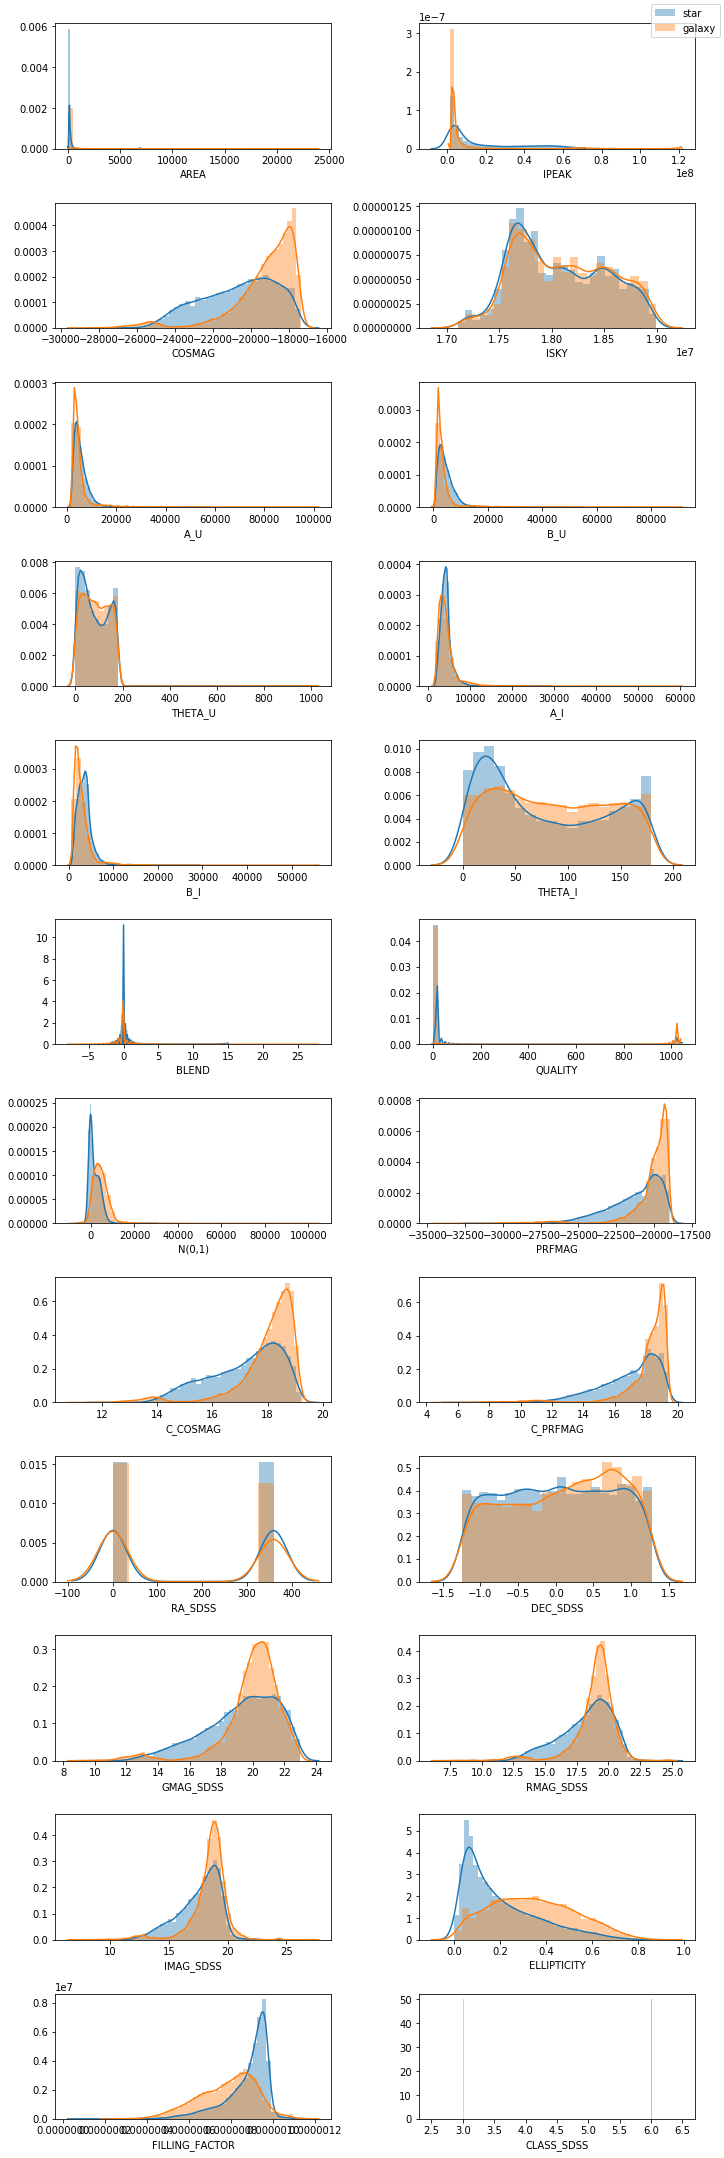

In [19]:
import math
width = 2
fig, ax = plt.subplots(math.floor(relevant_data_aug.shape[1]/width), width, figsize=(10,30))

for ii, col in enumerate(relevant_data_aug):
    sns.distplot(relevant_data_aug[col][relevant_data_aug.CLASS_SDSS == 6], ax=ax[math.floor(ii / width)][ii % width], label="star")
    sns.distplot(relevant_data_aug[col][relevant_data_aug.CLASS_SDSS == 3], ax=ax[math.floor(ii / width)][ii % width], label="galaxy")
    
fig.legend(("star", "galaxy"))
fig.tight_layout()
plt.show()

In [20]:
enumerate(relevant_data_aug)